<a href="https://colab.research.google.com/github/MuhammadHassan667410/Learning-Complete-Artificial-Intelligence/blob/main/Phase%202%20%3A%20Machine%20Learning/Supervised%20ML(Regression%20and%20Classification)/NaiveBayesSpamClassifierModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('spam.csv')

In [ ]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df['Category'] = df['Category'].map({'ham':0, 'spam':1})

In [ ]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
y = df.Category
x = df.Message



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
v = CountVectorizer()

In [ ]:
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3, 7703))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [ ]:
model.fit(x_train_count, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
x_test_count = v.transform(x_test)
model.score(x_test_count, y_test)

0.9838565022421525

In [ ]:
y_pred = model.predict(x_test_count)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(1115,))

0.9838565022421525


<Axes: >

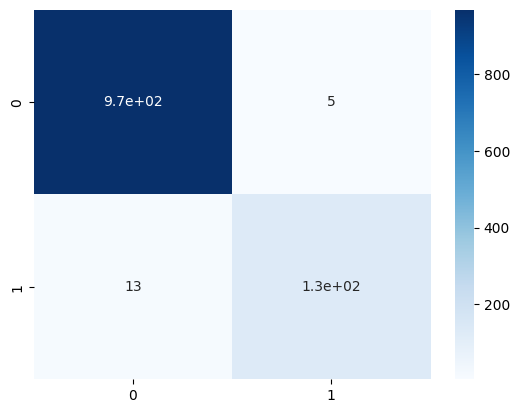

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc)
cm = confusion_matrix(y_test, y_pred)
cm
import seaborn as sns
sns.heatmap(cm, annot=True, cmap="Blues")

In [ ]:
emails = {
    'Get free Iphone',
    'Hi, I need your help at school'
}
emails_count = v.transform(emails)
model.predict(emails_count)

array([1, 0])

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(x_train, y_train)

,steps,"[('vectorizer', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
